# Plot basic behavior variables vs strain

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

cc = np.concatenate

FPS = 30.03
DT = 1/FPS

C_SONG_FBHV_FILE = 'data/simple/c_song_f_behav.csv'
W_SONG_FBHV_FILE = 'data/simple/w_song_f_behav.csv'

STRAIN_FILE = 'data/simple/strains.csv'

In [2]:
df_c = pd.read_csv(C_SONG_FBHV_FILE)
ntr_c = np.max(df_c.ID) + 1

dfs_tr = [df_c[df_c.ID == i] for i in range(ntr_c)]

df_w = pd.read_csv(W_SONG_FBHV_FILE)
ntr_w = np.max(df_w.ID) + 1

dfs_tr.extend([df_w[df_w.ID == i] for i in range(ntr_w)])

df_strain = pd.read_csv(STRAIN_FILE)
strains = np.array(df_strain['STRAIN'])
strains_unique = list(np.unique(strains))
print(strains_unique)

['CM07', 'CSTul', 'CarM03', 'N30', 'NM91', 'WTG', 'ZH23', 'ZW109']


### Show aggregate histograms + histograms conditioned on strain

Song stats

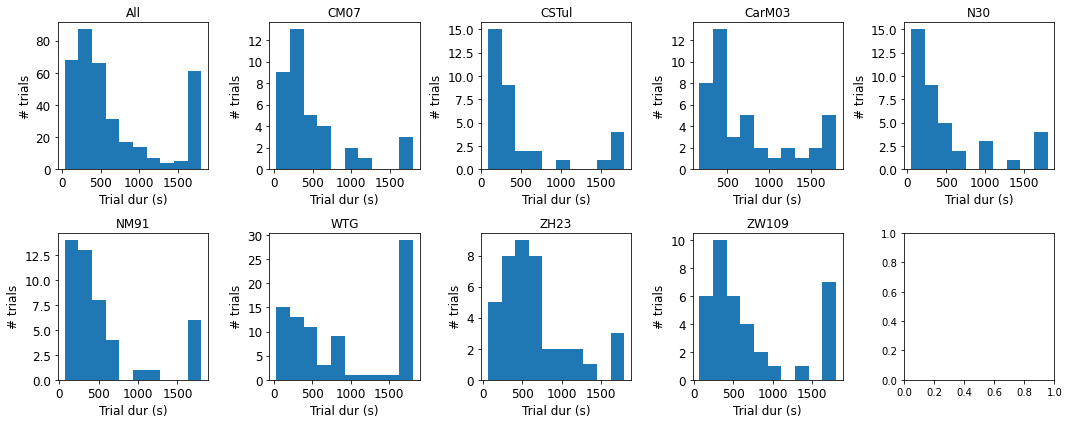

In [3]:
# trial duration
fig, axs = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for ax, strain in zip(axs.flatten(), ['All'] + strains_unique):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    
    tr_durs = np.array([DT*len(df_tr) for df_tr in dfs_tr_strain])
    
    ax.hist(tr_durs)
    set_plot(ax, x_label='Trial dur (s)', y_label='# trials', title=strain, font_size=12)

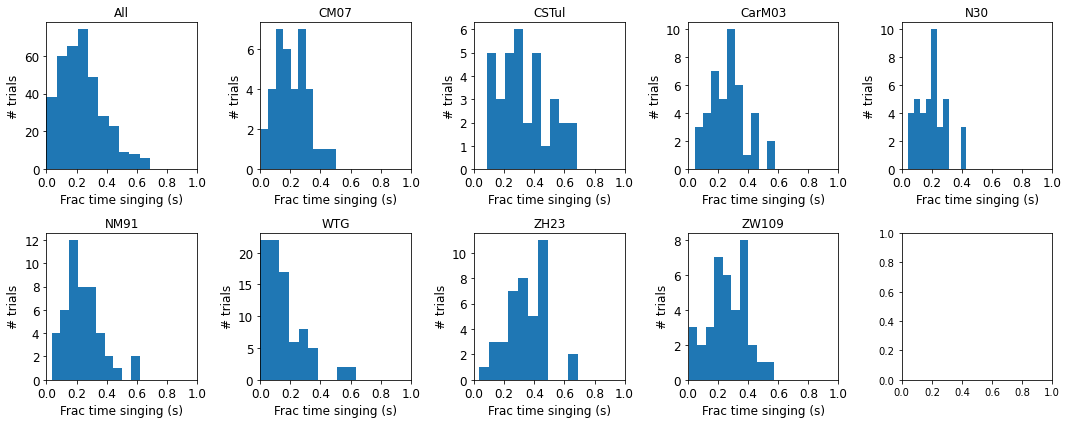

In [4]:
# fraction time singing
fig, axs = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for ax, strain in zip(axs.flatten(), ['All'] + strains_unique):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    
    frc_sing = np.array([np.mean(df_tr['Q'] == 0) for df_tr in dfs_tr_strain])
    
    ax.hist(frc_sing)
    set_plot(ax, x_lim=(0, 1), x_label='Frac time singing (s)', y_label='# trials', title=strain, font_size=12)

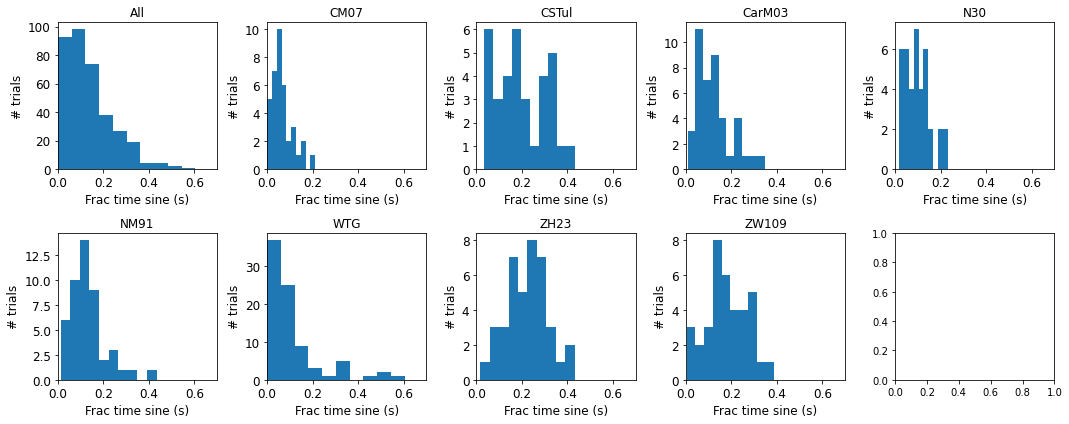

In [5]:
# fraction time sine
fig, axs = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for ax, strain in zip(axs.flatten(), ['All'] + strains_unique):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    
    frc_sing = np.array([np.mean(df_tr['S'] == 1) for df_tr in dfs_tr_strain])
    
    ax.hist(frc_sing)
    set_plot(ax, x_lim=(0, .7), x_label='Frac time sine (s)', y_label='# trials', title=strain, font_size=12)

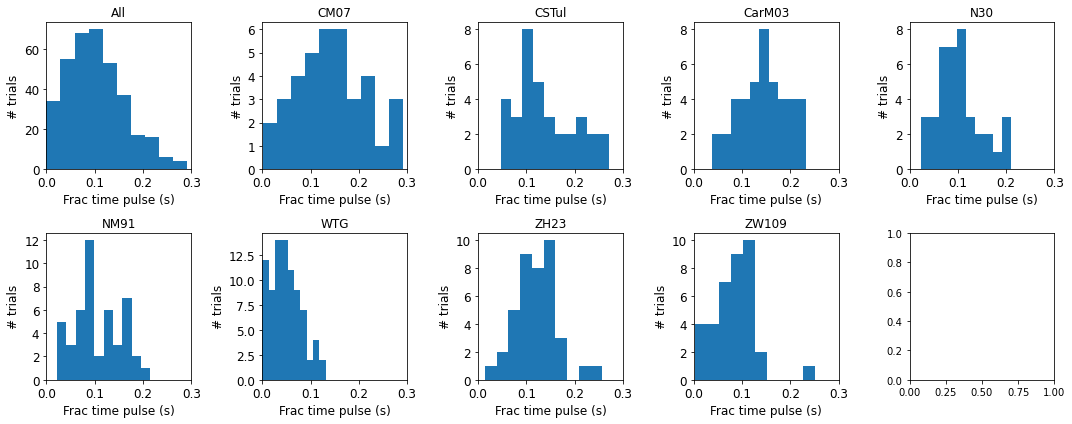

In [6]:
# fraction time pulse
fig, axs = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for ax, strain in zip(axs.flatten(), ['All'] + strains_unique):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    
    frc_sing = np.array([np.mean((df_tr['P'] == 1) | (df_tr['F'] == 1)) for df_tr in dfs_tr_strain])
    
    ax.hist(frc_sing)
    set_plot(ax, x_lim=(0, .3), x_label='Frac time pulse (s)', y_label='# trials', title=strain, font_size=12)

Female locomotion stats

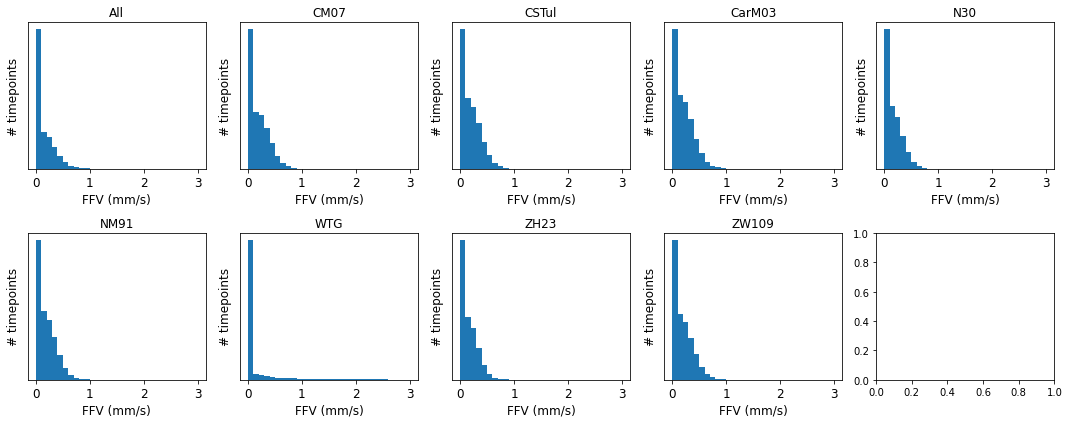

In [7]:
# female FFV
fig, axs = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for ax, strain in zip(axs.flatten(), ['All'] + strains_unique):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    
    ffv = cc([np.array(df_tr['FFV']) for df_tr in dfs_tr_strain])
    
    ax.hist(ffv, bins=np.linspace(0, 3, 31))
    set_plot(ax, y_ticks=[], x_label='FFV (mm/s)', y_label='# timepoints', title=strain, font_size=12)

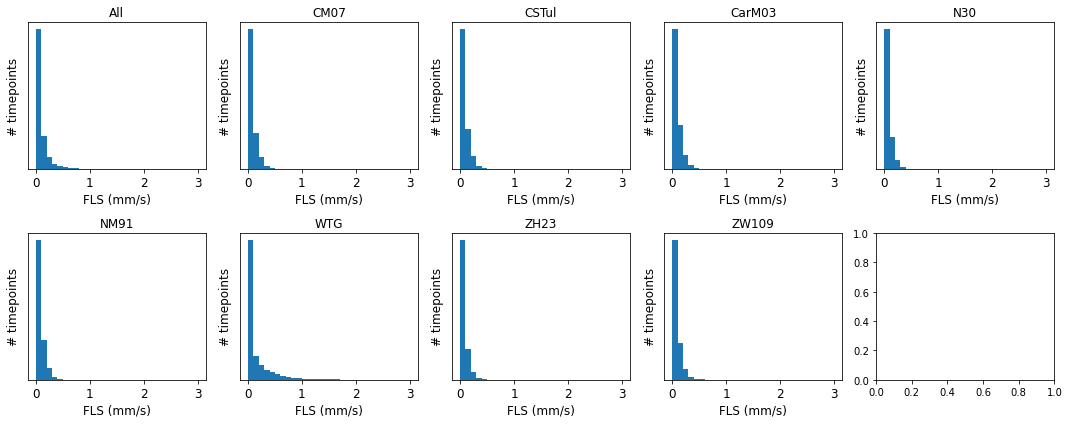

In [8]:
# female FLS
fig, axs = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for ax, strain in zip(axs.flatten(), ['All'] + strains_unique):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    
    fls = cc([np.array(df_tr['FLS']) for df_tr in dfs_tr_strain])
    
    ax.hist(fls, bins=np.linspace(0, 3, 31))
    set_plot(ax, y_ticks=[], x_label='FLS (mm/s)', y_label='# timepoints', title=strain, font_size=12)

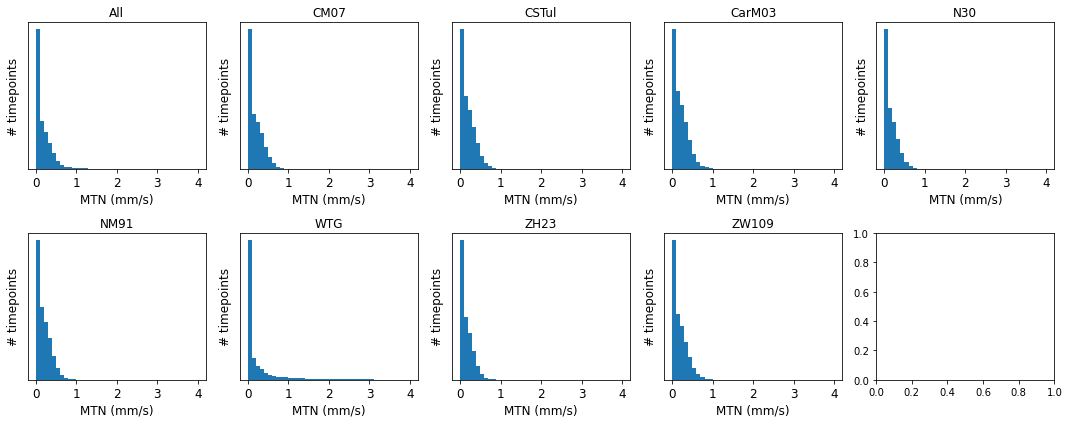

In [9]:
# female MTN
fig, axs = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for ax, strain in zip(axs.flatten(), ['All'] + strains_unique):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    
    ffv = cc([np.array(df_tr['FFV']) for df_tr in dfs_tr_strain])
    fls = cc([np.array(df_tr['FLS']) for df_tr in dfs_tr_strain])
    
    mtn = np.sqrt(ffv**2 + fls**2)
    
    ax.hist(mtn, bins=np.linspace(0, 4, 41))
    set_plot(ax, y_ticks=[], x_label='MTN (mm/s)', y_label='# timepoints', title=strain, font_size=12)

# Frac trials singing and singing in each mode over time

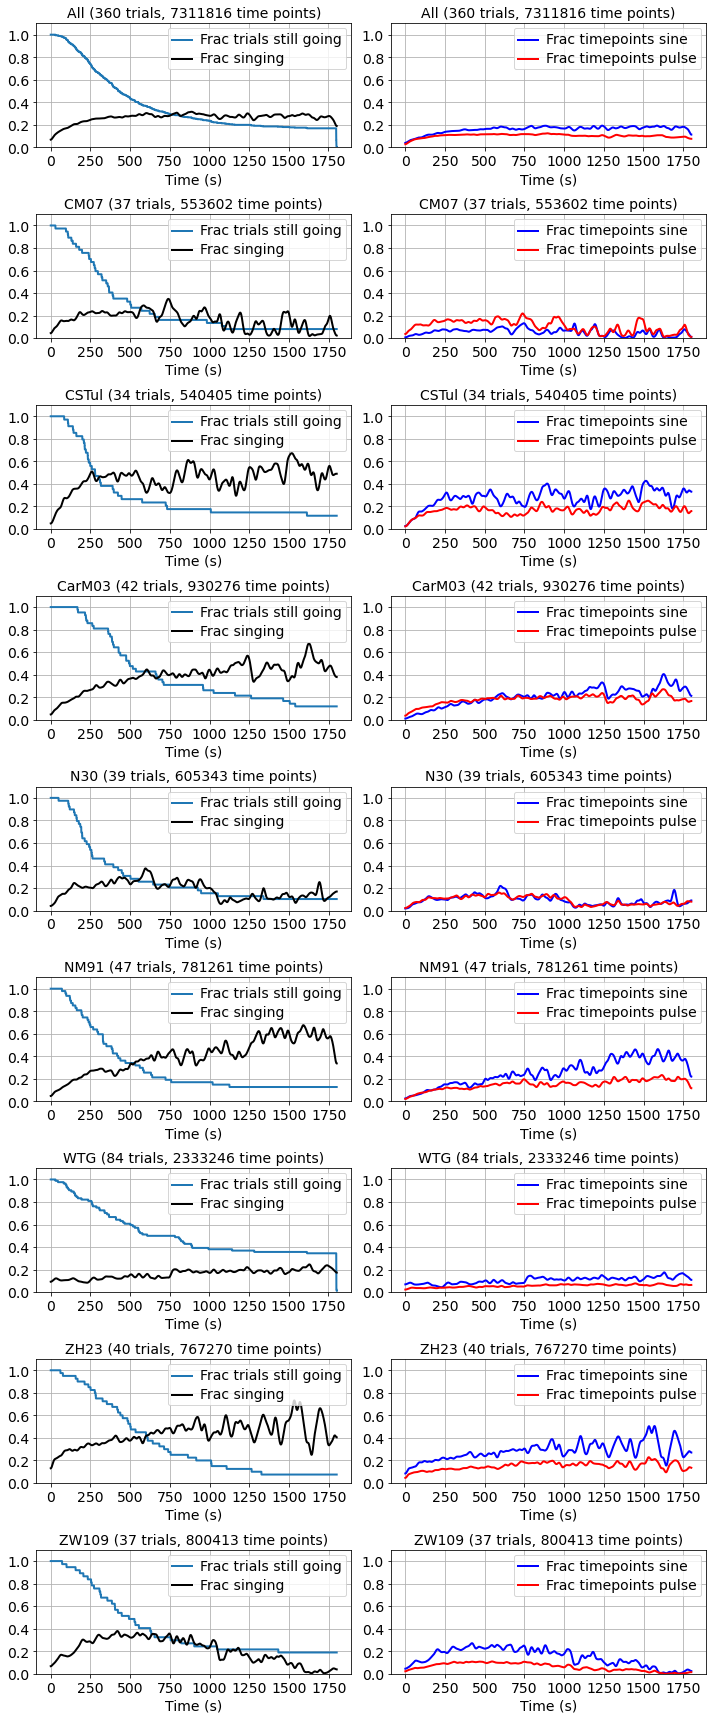

In [10]:
from scipy.ndimage import gaussian_filter1d as smooth
SMOOTH = int(round(10/DT))

fig, axs_all = plt.subplots(len(strains_unique)+1, 2, figsize=(10, 3*len(strains_unique)), tight_layout=True)

for strain, axs in zip(['All'] + strains_unique, axs_all):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    tr_lens = [len(df_tr) for df_tr in dfs_tr_strain]
    
    songs = np.nan * np.ones((len(dfs_tr_strain), np.max(tr_lens)))
    for ctr, df_tr in enumerate(dfs_tr_strain):
        song = np.zeros(len(df_tr), dtype=int)
        song[np.array(df_tr['S'], dtype=bool)] = 1
        song[np.array(df_tr['P'] | df_tr['F'], dtype=bool)] = 2
        songs[ctr, :len(df_tr)] = song

    frac_ongoing = np.mean(~np.isnan(songs), axis=0)

    axs[0].plot(DT*np.arange(songs.shape[1]), frac_ongoing, lw=2)

    frac_singing = smooth(np.mean(songs > 0, axis=0)/frac_ongoing, SMOOTH)

    axs[0].plot(DT*np.arange(songs.shape[1]), frac_singing, lw=2, c='k')
    axs[0].set_ylim(0, 1.1)
    axs[0].set_xlabel('Time (s)')
    # axs[0].set_ylabel('Fraction trials still going')
    axs[0].legend(['Frac trials still going', 'Frac singing'])

    frac_sine = smooth(np.mean(songs == 1, axis=0)/frac_ongoing, SMOOTH)
    frac_pulse = smooth(np.mean(songs == 2, axis=0)/frac_ongoing, SMOOTH)

    axs[1].plot(DT*np.arange(songs.shape[1]), frac_sine, lw=2, c='b')
    axs[1].plot(DT*np.arange(songs.shape[1]), frac_pulse, lw=2, c='r')
    axs[1].set_ylim(0, 1.1)

    axs[1].set_xlabel('Time (s)')
    axs[1].legend(['Frac timepoints sine', 'Frac timepoints pulse'])

    for ax in axs:
        ax.grid()
        set_plot(ax, title=f'{strain} ({len(tr_lens)} trials, {np.sum(tr_lens)} time points)', font_size=14)
        
fig.savefig(f'supp/11_strains_song.svg')

# Avg female movement speed over time

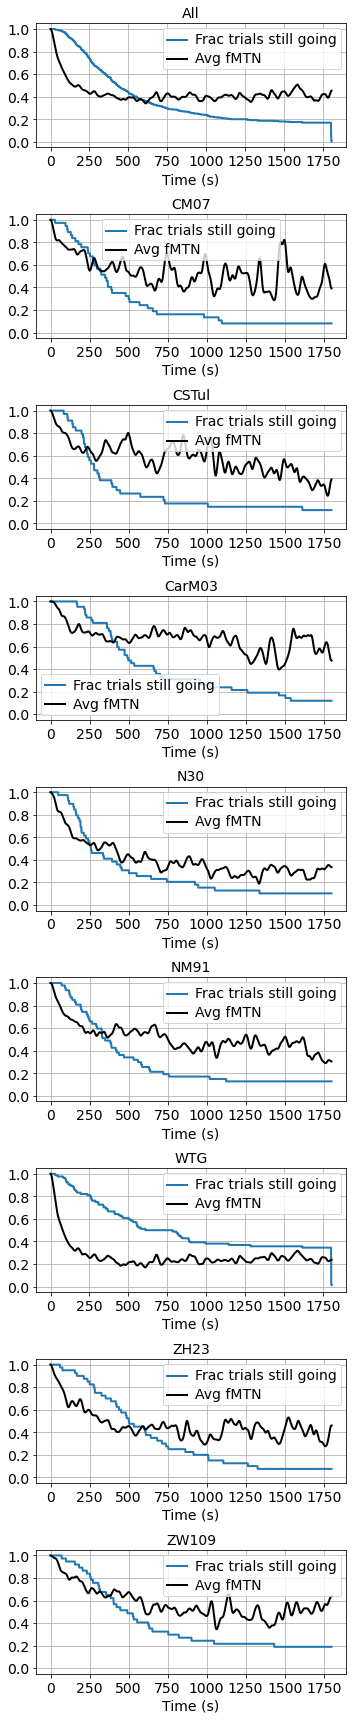

In [12]:
from scipy.ndimage import gaussian_filter1d as smooth
SMOOTH = int(round(10/DT))

fig, axs = plt.subplots(len(strains_unique)+1, 1, figsize=(5, 3*len(strains_unique)), tight_layout=True)

for strain, ax in zip(['All'] + strains_unique, axs):
    if strain == 'All':
        istrain = np.arange(len(dfs_tr))
    else:
        istrain = (strains == strain).nonzero()[0]
        
    dfs_tr_strain = [dfs_tr[i] for i in istrain]
    tr_lens = [len(df_tr) for df_tr in dfs_tr_strain]
    
    mtns = np.nan * np.ones((len(dfs_tr_strain), np.max(tr_lens)))
    for ctr, df_tr in enumerate(dfs_tr_strain):
        mtn = np.array(np.sqrt(df_tr['FFV']**2 + df_tr['FLS']**2))
        mtns[ctr, :len(df_tr)] = mtn 

    songs = np.nan * np.ones((len(dfs_tr_strain), np.max(tr_lens)))
    for ctr, df_tr in enumerate(dfs_tr_strain):
        song = np.zeros(len(df_tr), dtype=int)
        song[np.array(df_tr['S'], dtype=bool)] = 1
        song[np.array(df_tr['P'] | df_tr['F'], dtype=bool)] = 2
        songs[ctr, :len(df_tr)] = song

    frac_ongoing = np.mean(~np.isnan(songs), axis=0)

    mtn_mean = smooth(np.nanmean(mtns, axis=0), SMOOTH)
    mtn_mean /= mtn_mean.max()

    # fig, ax = plt.subplots(1, 1, figsize=(7, 4), tight_layout=True)
    ax.plot(DT*np.arange(songs.shape[1]), frac_ongoing, lw=2)
    ax.plot(DT*np.arange(songs.shape[1]), mtn_mean, lw=2, c='k')
    ax.set_xlabel('Time (s)')
    ax.legend(['Frac trials still going', 'Avg fMTN'])

    ax.grid()
    set_plot(ax, y_lim=(-.05, 1.05), title=f'{strain}', font_size=14)
    
fig.savefig(f'supp/11_strain_fmtn.svg')